In [1]:
#importing data management, data visualisation libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('/Users/Z002KG2/Documents/KL Real Estate Size.csv')
data

,Location,Price,Rooms,Bathrooms,Car Parks,Furnishing,Size,Type,Property Type,Position,No of Storey
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Fully Furnished,1335,Built-up,Serviced Residence,Unknown,0.0
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Partly Furnished,6900,Land area,Bungalow,Unknown,0.0
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Partly Furnished,1875,Built-up,Condominium,Corner,0.0
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,0,Unknown,NaN,Unknown,0.0
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Partly Furnished,1513,Built-up,Condominium,Corner,0.0
...,...,...,...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur","RM 5,100,000",5+1,4.0,NaN,Fully Furnished,7168,Land area,Bungalow,Corner,0.0
53879,"Bangsar, Kuala Lumpur","RM 5,000,000",5,4.0,NaN,Unfurnished,15000,Land area,Bungalow,Intermediate,0.0
53880,"Bangsar, Kuala Lumpur","RM 5,500,000",5+1,4.0,NaN,Partly Furnished,7168,Land area,Bungalow,Intermediate,0.0
53881,"Wangsa Maju, Kuala Lumpur","RM 480,000",3,2.0,NaN,Unfurnished,1150,Built-up,Condominium,Intermediate,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Furnishing     46953 non-null  object 
 6   Size           53883 non-null  object 
 7   Type           53883 non-null  object 
 8   Property Type  53858 non-null  object 
 9   Position       53883 non-null  object 
 10  No of Storey   53883 non-null  float64
dtypes: float64(3), object(8)
memory usage: 4.5+ MB


In [4]:
data.duplicated().sum()

4557

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.duplicated().sum()

0

In [7]:
data.dtypes

Location          object
Price             object
Rooms             object
Bathrooms        float64
Car Parks        float64
Furnishing        object
Size              object
Type              object
Property Type     object
Position          object
No of Storey     float64
dtype: object

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bathrooms,47467.0,3.104009,1.649434,1.0,2.0,3.0,4.0,20.0
Car Parks,33082.0,2.028052,1.339974,1.0,1.0,2.0,2.0,30.0
No of Storey,49326.0,0.328924,0.824506,0.0,0.0,0.0,0.0,4.5


In [9]:
#Cleaning Location column
# Split the column with commas into two separate columns
data[['area', 'L2', 'L3']] = data['Location'].str.split(',' ,expand=True)
data.drop(columns=["Location","L2","L3"], inplace=True)
data

,Price,Rooms,Bathrooms,Car Parks,Furnishing,Size,Type,Property Type,Position,No of Storey,area
0,"RM 1,250,000",2+1,3.0,2.0,Fully Furnished,1335,Built-up,Serviced Residence,Unknown,0.0,KLCC
1,"RM 6,800,000",6,7.0,NaN,Partly Furnished,6900,Land area,Bungalow,Unknown,0.0,Damansara Heights
2,"RM 1,030,000",3,4.0,2.0,Partly Furnished,1875,Built-up,Condominium,Corner,0.0,Dutamas
3,NaN,NaN,NaN,NaN,NaN,0,Unknown,NaN,Unknown,0.0,Cheras
4,"RM 900,000",4+1,3.0,2.0,Partly Furnished,1513,Built-up,Condominium,Corner,0.0,Bukit Jalil
...,...,...,...,...,...,...,...,...,...,...,...
53878,"RM 5,100,000",5+1,4.0,NaN,Fully Furnished,7168,Land area,Bungalow,Corner,0.0,Bangsar
53879,"RM 5,000,000",5,4.0,NaN,Unfurnished,15000,Land area,Bungalow,Intermediate,0.0,Bangsar
53880,"RM 5,500,000",5+1,4.0,NaN,Partly Furnished,7168,Land area,Bungalow,Intermediate,0.0,Bangsar
53881,"RM 480,000",3,2.0,NaN,Unfurnished,1150,Built-up,Condominium,Intermediate,0.0,Wangsa Maju


In [10]:
# Splitting the Rooms column and creating two new columns, no of bed room, servant rooms
data[['No_of_Bedrooms', 'No_of_servant_rooms']] = data['Rooms'].str.split('+', expand=True)
data.drop(columns="Rooms", inplace=True)


In [12]:
data['No_of_servant_rooms'].isna().sum()

30268

In [13]:
data['No_of_servant_rooms'].fillna(value=0, inplace=True)

In [14]:
data['Bathrooms'].fillna(value=0, inplace=True)
data['Car Parks'].fillna(value=0, inplace=True)
data['No_of_Bedrooms'].fillna(value=0, inplace=True)

In [15]:
# Convert 'Bathrooms' column to integer
data['Bathrooms'] = data['Bathrooms'].astype(int)
data

,Price,Bathrooms,Car Parks,Furnishing,Size,Type,Property Type,Position,No of Storey,area,No_of_Bedrooms,No_of_servant_rooms
0,"RM 1,250,000",3,2.0,Fully Furnished,1335,Built-up,Serviced Residence,Unknown,0.0,KLCC,2,1
1,"RM 6,800,000",7,0.0,Partly Furnished,6900,Land area,Bungalow,Unknown,0.0,Damansara Heights,6,0
2,"RM 1,030,000",4,2.0,Partly Furnished,1875,Built-up,Condominium,Corner,0.0,Dutamas,3,0
3,NaN,0,0.0,NaN,0,Unknown,NaN,Unknown,0.0,Cheras,0,0
4,"RM 900,000",3,2.0,Partly Furnished,1513,Built-up,Condominium,Corner,0.0,Bukit Jalil,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
53878,"RM 5,100,000",4,0.0,Fully Furnished,7168,Land area,Bungalow,Corner,0.0,Bangsar,5,1
53879,"RM 5,000,000",4,0.0,Unfurnished,15000,Land area,Bungalow,Intermediate,0.0,Bangsar,5,0
53880,"RM 5,500,000",4,0.0,Partly Furnished,7168,Land area,Bungalow,Intermediate,0.0,Bangsar,5,1
53881,"RM 480,000",2,0.0,Unfurnished,1150,Built-up,Condominium,Intermediate,0.0,Wangsa Maju,3,0


In [19]:
# Convert 'Car Parks' column to integer
data['Car Parks'] = data['Car Parks'].astype(int)
data

,Price,Bathrooms,Car Parks,Furnishing,Size,Type,Property Type,Position,No of Storey,area,No_of_Bedrooms,No_of_servant_rooms
0,"RM 1,250,000",3,2,Fully Furnished,1335,Built-up,Serviced Residence,Unknown,0.0,KLCC,2,1
1,"RM 6,800,000",7,0,Partly Furnished,6900,Land area,Bungalow,Unknown,0.0,Damansara Heights,6,0
2,"RM 1,030,000",4,2,Partly Furnished,1875,Built-up,Condominium,Corner,0.0,Dutamas,3,0
3,NaN,0,0,Unknown,0,Unknown,NaN,Unknown,0.0,Cheras,0,0
4,"RM 900,000",3,2,Partly Furnished,1513,Built-up,Condominium,Corner,0.0,Bukit Jalil,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
53878,"RM 5,100,000",4,0,Fully Furnished,7168,Land area,Bungalow,Corner,0.0,Bangsar,5,1
53879,"RM 5,000,000",4,0,Unfurnished,15000,Land area,Bungalow,Intermediate,0.0,Bangsar,5,0
53880,"RM 5,500,000",4,0,Partly Furnished,7168,Land area,Bungalow,Intermediate,0.0,Bangsar,5,1
53881,"RM 480,000",2,0,Unfurnished,1150,Built-up,Condominium,Intermediate,0.0,Wangsa Maju,3,0


In [20]:
data.isna().sum()

Price                  218
Bathrooms                0
Car Parks                0
Furnishing               0
Size                     0
Type                     0
Property Type           18
Position                 0
No of Storey             0
area                     0
No_of_Bedrooms           0
No_of_servant_rooms      0
dtype: int64

In [18]:
data.fillna(value={'Furnishing': 'Unknown'}, inplace=True)

In [21]:
data= data.dropna()
data.reset_index(drop=True, inplace=True) 
data

,Price,Bathrooms,Car Parks,Furnishing,Size,Type,Property Type,Position,No of Storey,area,No_of_Bedrooms,No_of_servant_rooms
0,"RM 1,250,000",3,2,Fully Furnished,1335,Built-up,Serviced Residence,Unknown,0.0,KLCC,2,1
1,"RM 6,800,000",7,0,Partly Furnished,6900,Land area,Bungalow,Unknown,0.0,Damansara Heights,6,0
2,"RM 1,030,000",4,2,Partly Furnished,1875,Built-up,Condominium,Corner,0.0,Dutamas,3,0
3,"RM 900,000",3,2,Partly Furnished,1513,Built-up,Condominium,Corner,0.0,Bukit Jalil,4,1
4,"RM 5,350,000",5,4,Partly Furnished,7200,Land area,Bungalow,Unknown,0.0,Taman Tun Dr Ismail,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
49103,"RM 5,100,000",4,0,Fully Furnished,7168,Land area,Bungalow,Corner,0.0,Bangsar,5,1
49104,"RM 5,000,000",4,0,Unfurnished,15000,Land area,Bungalow,Intermediate,0.0,Bangsar,5,0
49105,"RM 5,500,000",4,0,Partly Furnished,7168,Land area,Bungalow,Intermediate,0.0,Bangsar,5,1
49106,"RM 480,000",2,0,Unfurnished,1150,Built-up,Condominium,Intermediate,0.0,Wangsa Maju,3,0


In [22]:

data['Size'] = data['Size'].replace({' Kuala Lumpur', 'Kuala Lumpur'},1)
data['Size'] = data['Size'].replace({' Malaysia', 'Malaysia'},2)

data['Size'] = data['Size'].astype(float)

/var/folders/v1/j00fh10s3f32ld3649fyv3qc0000gq/T/ipykernel_39816/580823789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Size'] = data['Size'].replace({' Kuala Lumpur', 'Kuala Lumpur'},1)
/var/folders/v1/j00fh10s3f32ld3649fyv3qc0000gq/T/ipykernel_39816/580823789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Size'] = data['Size'].replace({' Malaysia', 'Malaysia'},2)
/var/folders/v1/j00fh10s3f32ld3649fyv3qc0000gq/T/ipykernel_39816/580823789.py:4: SettingWithCopyWarning: 
A value is try

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49108 entries, 0 to 49107
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                49108 non-null  object 
 1   Bathrooms            49108 non-null  int64  
 2   Car Parks            49108 non-null  int64  
 3   Furnishing           49108 non-null  object 
 4   Size                 49108 non-null  float64
 5   Type                 49108 non-null  object 
 6   Property Type        49108 non-null  object 
 7   Position             49108 non-null  object 
 8   No of Storey         49108 non-null  float64
 9   area                 49108 non-null  object 
 10  No_of_Bedrooms       49108 non-null  object 
 11  No_of_servant_rooms  49108 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 4.5+ MB


In [24]:
# Use regex to remove non-digit characters and keep only numbers
data['No_of_servant_rooms'] = data['No_of_servant_rooms'].str.replace(r'\D+', '', regex=True)

# Replace empty strings or NaN values with a placeholder value (e.g., '0')
data['No_of_servant_rooms'].replace('', '0', inplace=True)
data['No_of_servant_rooms'].fillna('0', inplace=True)

# Convert the column to integer type
data['No_of_servant_rooms'] = data['No_of_servant_rooms'].astype(int)


/var/folders/v1/j00fh10s3f32ld3649fyv3qc0000gq/T/ipykernel_39816/4288363492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No_of_servant_rooms'] = data['No_of_servant_rooms'].str.replace(r'\D+', '', regex=True)
/var/folders/v1/j00fh10s3f32ld3649fyv3qc0000gq/T/ipykernel_39816/4288363492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No_of_servant_rooms'].replace('', '0', inplace=True)
/var/folders/v1/j00fh10s3f32ld3649fyv3qc0000gq/T/ipykernel_39816/4288363492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [114]:
data

,Price,Bathrooms,Car Parks,Furnishing,Size,Type,Property Type,Position,No of Storey,area,No_of_Bedrooms,No_of_servant_rooms
0,"RM 1,250,000",3,2,Fully Furnished,1335.0,Built-up,Serviced Residence,Unknown,0.0,KLCC,2,1
1,"RM 6,800,000",7,0,Partly Furnished,6900.0,Land area,Bungalow,Unknown,0.0,Damansara Heights,6,0
2,"RM 1,030,000",4,2,Partly Furnished,1875.0,Built-up,Condominium,Corner,0.0,Dutamas,3,0
3,"RM 900,000",3,2,Partly Furnished,1513.0,Built-up,Condominium,Corner,0.0,Bukit Jalil,4,1
4,"RM 5,350,000",5,4,Partly Furnished,7200.0,Land area,Bungalow,Unknown,0.0,Taman Tun Dr Ismail,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
49103,"RM 5,100,000",4,0,Fully Furnished,7168.0,Land area,Bungalow,Corner,0.0,Bangsar,5,1
49104,"RM 5,000,000",4,0,Unfurnished,15000.0,Land area,Bungalow,Intermediate,0.0,Bangsar,5,0
49105,"RM 5,500,000",4,0,Partly Furnished,7168.0,Land area,Bungalow,Intermediate,0.0,Bangsar,5,1
49106,"RM 480,000",2,0,Unfurnished,1150.0,Built-up,Condominium,Intermediate,0.0,Wangsa Maju,3,0


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49108 entries, 0 to 49107
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                49108 non-null  object 
 1   Bathrooms            49108 non-null  int64  
 2   Car Parks            49108 non-null  int64  
 3   Furnishing           49108 non-null  object 
 4   Size                 49108 non-null  float64
 5   Type                 49108 non-null  object 
 6   Property Type        49108 non-null  object 
 7   Position             49108 non-null  object 
 8   No of Storey         49108 non-null  float64
 9   area                 49108 non-null  object 
 10  No_of_Bedrooms       49108 non-null  object 
 11  No_of_servant_rooms  49108 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [26]:
# Calculate minimum and maximum size values for studio records
min_size_studio = data.loc[data['No_of_Bedrooms'] == 'Studio', 'Size'].min()
max_size_studio = data.loc[data['No_of_Bedrooms'] == 'Studio', 'Size'].max()
mean_size_studio = data.loc[data['No_of_Bedrooms'] == 'Studio', 'Size'].mean()

print("Minimum size for studio records:", min_size_studio)
print("Maximum size for studio records:", max_size_studio)
print("Mean size for studio records:", mean_size_studio)

Minimum size for studio records: 0.0
Maximum size for studio records: 583704.0
Mean size for studio records: 2554.0


In [25]:
data['No_of_Bedrooms'].value_counts()

No_of_Bedrooms
3           20704
4            9064
2            6723
5            4528
1            3101
6            1755
0            1533
Studio        777
7             602
8             191
9              53
10             37
12             12
11              9
20 Above        8
13              5
14              2
16              2
15              1
18              1
Name: count, dtype: int64

In [27]:
# Create a new column 'studio_apartment'
data['studio_apartment'] = data['No_of_Bedrooms'].apply(lambda x: 1 if x == 'Studio' else 0)

/var/folders/v1/j00fh10s3f32ld3649fyv3qc0000gq/T/ipykernel_39816/681213311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['studio_apartment'] = data['No_of_Bedrooms'].apply(lambda x: 1 if x == 'Studio' else 0)


In [28]:
# Replace 'studio' values in 'No_of_Bedrooms' column with 0
data['No_of_Bedrooms'].replace({'Studio': 0, '20 Above': 21}, inplace=True)

data

/var/folders/v1/j00fh10s3f32ld3649fyv3qc0000gq/T/ipykernel_39816/2864032243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No_of_Bedrooms'].replace({'Studio': 0, '20 Above': 21}, inplace=True)


,Price,Bathrooms,Car Parks,Furnishing,Size,Type,Property Type,Position,No of Storey,area,No_of_Bedrooms,No_of_servant_rooms,studio_apartment
0,"RM 1,250,000",3,2,Fully Furnished,1335.0,Built-up,Serviced Residence,Unknown,0.0,KLCC,2,1,0
1,"RM 6,800,000",7,0,Partly Furnished,6900.0,Land area,Bungalow,Unknown,0.0,Damansara Heights,6,0,0
2,"RM 1,030,000",4,2,Partly Furnished,1875.0,Built-up,Condominium,Corner,0.0,Dutamas,3,0,0
3,"RM 900,000",3,2,Partly Furnished,1513.0,Built-up,Condominium,Corner,0.0,Bukit Jalil,4,1,0
4,"RM 5,350,000",5,4,Partly Furnished,7200.0,Land area,Bungalow,Unknown,0.0,Taman Tun Dr Ismail,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49103,"RM 5,100,000",4,0,Fully Furnished,7168.0,Land area,Bungalow,Corner,0.0,Bangsar,5,1,0
49104,"RM 5,000,000",4,0,Unfurnished,15000.0,Land area,Bungalow,Intermediate,0.0,Bangsar,5,0,0
49105,"RM 5,500,000",4,0,Partly Furnished,7168.0,Land area,Bungalow,Intermediate,0.0,Bangsar,5,1,0
49106,"RM 480,000",2,0,Unfurnished,1150.0,Built-up,Condominium,Intermediate,0.0,Wangsa Maju,3,0,0


In [29]:
data.studio_apartment.value_counts()

studio_apartment
0    48331
1      777
Name: count, dtype: int64

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49108 entries, 0 to 49107
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                49108 non-null  object 
 1   Bathrooms            49108 non-null  int64  
 2   Car Parks            49108 non-null  int64  
 3   Furnishing           49108 non-null  object 
 4   Size                 49108 non-null  float64
 5   Type                 49108 non-null  object 
 6   Property Type        49108 non-null  object 
 7   Position             49108 non-null  object 
 8   No of Storey         49108 non-null  float64
 9   area                 49108 non-null  object 
 10  No_of_Bedrooms       49108 non-null  object 
 11  No_of_servant_rooms  49108 non-null  int64  
 12  studio_apartment     49108 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 4.9+ MB


In [35]:
data['No_of_Bedrooms']=data['No_of_Bedrooms'].astype(int)

/var/folders/v1/j00fh10s3f32ld3649fyv3qc0000gq/T/ipykernel_39816/1804879422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No_of_Bedrooms']=data['No_of_Bedrooms'].astype(int)


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49108 entries, 0 to 49107
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                49108 non-null  object 
 1   Bathrooms            49108 non-null  int64  
 2   Car Parks            49108 non-null  int64  
 3   Furnishing           49108 non-null  object 
 4   Size                 49108 non-null  float64
 5   Type                 49108 non-null  object 
 6   Property Type        49108 non-null  object 
 7   Position             49108 non-null  object 
 8   No of Storey         49108 non-null  float64
 9   area                 49108 non-null  object 
 10  No_of_Bedrooms       49108 non-null  int64  
 11  No_of_servant_rooms  49108 non-null  int64  
 12  studio_apartment     49108 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 4.9+ MB


In [124]:
data

,Price,Bathrooms,Car Parks,Furnishing,Size,Type,Property Type,Position,No of Storey,area,No_of_Bedrooms,No_of_servant_rooms,studio_apartment
0,"RM 1,250,000",3,2,Fully Furnished,1335.0,Built-up,Serviced Residence,Unknown,0.0,KLCC,2,1,0
1,"RM 6,800,000",7,0,Partly Furnished,6900.0,Land area,Bungalow,Unknown,0.0,Damansara Heights,6,0,0
2,"RM 1,030,000",4,2,Partly Furnished,1875.0,Built-up,Condominium,Corner,0.0,Dutamas,3,0,0
3,"RM 900,000",3,2,Partly Furnished,1513.0,Built-up,Condominium,Corner,0.0,Bukit Jalil,4,1,0
4,"RM 5,350,000",5,4,Partly Furnished,7200.0,Land area,Bungalow,Unknown,0.0,Taman Tun Dr Ismail,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49103,"RM 5,100,000",4,0,Fully Furnished,7168.0,Land area,Bungalow,Corner,0.0,Bangsar,5,1,0
49104,"RM 5,000,000",4,0,Unfurnished,15000.0,Land area,Bungalow,Intermediate,0.0,Bangsar,5,0,0
49105,"RM 5,500,000",4,0,Partly Furnished,7168.0,Land area,Bungalow,Intermediate,0.0,Bangsar,5,1,0
49106,"RM 480,000",2,0,Unfurnished,1150.0,Built-up,Condominium,Intermediate,0.0,Wangsa Maju,3,0,0


In [30]:
#Cleaning Price column
data['Price'] = data['Price'].str.replace(r'\D+', '', regex=True).astype(int)

data

/var/folders/v1/j00fh10s3f32ld3649fyv3qc0000gq/T/ipykernel_39816/344658200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace(r'\D+', '', regex=True).astype(int)


,Price,Bathrooms,Car Parks,Furnishing,Size,Type,Property Type,Position,No of Storey,area,No_of_Bedrooms,No_of_servant_rooms,studio_apartment
0,1250000,3,2,Fully Furnished,1335.0,Built-up,Serviced Residence,Unknown,0.0,KLCC,2,1,0
1,6800000,7,0,Partly Furnished,6900.0,Land area,Bungalow,Unknown,0.0,Damansara Heights,6,0,0
2,1030000,4,2,Partly Furnished,1875.0,Built-up,Condominium,Corner,0.0,Dutamas,3,0,0
3,900000,3,2,Partly Furnished,1513.0,Built-up,Condominium,Corner,0.0,Bukit Jalil,4,1,0
4,5350000,5,4,Partly Furnished,7200.0,Land area,Bungalow,Unknown,0.0,Taman Tun Dr Ismail,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49103,5100000,4,0,Fully Furnished,7168.0,Land area,Bungalow,Corner,0.0,Bangsar,5,1,0
49104,5000000,4,0,Unfurnished,15000.0,Land area,Bungalow,Intermediate,0.0,Bangsar,5,0,0
49105,5500000,4,0,Partly Furnished,7168.0,Land area,Bungalow,Intermediate,0.0,Bangsar,5,1,0
49106,480000,2,0,Unfurnished,1150.0,Built-up,Condominium,Intermediate,0.0,Wangsa Maju,3,0,0


In [31]:
data.isna().sum()

Price                  0
Bathrooms              0
Car Parks              0
Furnishing             0
Size                   0
Type                   0
Property Type          0
Position               0
No of Storey           0
area                   0
No_of_Bedrooms         0
No_of_servant_rooms    0
studio_apartment       0
dtype: int64

In [127]:
data.to_csv('KL_clean_data.csv',index=False)

In [32]:
data['Size'].replace({'1': data['Size'].mean(), '2': data['Size'].median()})

0         1335.0
1         6900.0
2         1875.0
3         1513.0
4         7200.0
          ...   
49103     7168.0
49104    15000.0
49105     7168.0
49106     1150.0
49107     1313.0
Name: Size, Length: 49108, dtype: float64

In [54]:
df = data.copy()

In [60]:
df_cond = data.copy()

Bathrooms: 0.6117
Car Parks: 0.3053
Furnishing: 0.1862
Size: 1.2349
Type: 0.1325
Property Type: 0.5595
Position: 0.5648
No of Storey: 0.0814
area: 0.5970
No_of_Bedrooms: 0.4148
No_of_servant_rooms: 0.2284
studio_apartment: 0.0052


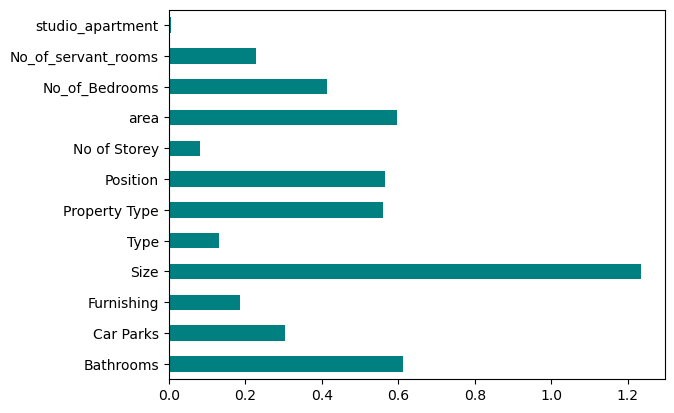

In [55]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder



# Encode categorical variables with LabelEncoder
encoder = LabelEncoder()
df['Property Type'] = encoder.fit_transform(df['Property Type'])
df['Position'] = encoder.fit_transform(df['Property Type'])
df['Furnishing'] = encoder.fit_transform(df['Furnishing'])
df['area'] = encoder.fit_transform(df['area'])
df['Type'] = encoder.fit_transform(df['Type'])

# Separate features (X) and target variable (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)

# Print feature importance scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")


feat_importances = pd.Series(mi_scores, X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49108 entries, 0 to 49107
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                49108 non-null  int64  
 1   Bathrooms            49108 non-null  int64  
 2   Car Parks            49108 non-null  int64  
 3   Furnishing           49108 non-null  int64  
 4   Size                 49108 non-null  float64
 5   Type                 49108 non-null  int64  
 6   Property Type        49108 non-null  int64  
 7   Position             49108 non-null  int64  
 8   No of Storey         49108 non-null  float64
 9   area                 49108 non-null  int64  
 10  No_of_Bedrooms       49108 non-null  object 
 11  No_of_servant_rooms  49108 non-null  int64  
 12  studio_apartment     49108 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 4.9+ MB


In [41]:
from sklearn.preprocessing import MinMaxScaler


# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(X)

print("Original data:")
print(X)
print("\nScaled data:")
print(scaled_data)


Original data:
       Bathrooms  Car Parks  Furnishing     Size  Type  Property Type  \
0              3          2           0   1335.0     0              8   
1              7          0           1   6900.0     1              1   
2              4          2           1   1875.0     0              4   
3              3          2           1   1513.0     0              4   
4              5          4           1   7200.0     1              1   
...          ...        ...         ...      ...   ...            ...   
49103          4          0           0   7168.0     1              1   
49104          4          0           2  15000.0     1              1   
49105          4          0           1   7168.0     1              1   
49106          2          0           2   1150.0     0              4   
49107          2          3           1   1313.0     0              4   

       Position  No of Storey  area No_of_Bedrooms  No_of_servant_rooms  \
0             8           0.0    

In [56]:
def regressionMethods(x, y, regressionObject):
  train_x, test_x, train_y, test_y= train_test_split(x,y,test_size=0.25, random_state=1)
  regressionObject.fit(train_x, train_y)
  predict_test=regressionObject.predict(test_x)
  columns = x.shape[1]
  df_m=pd.DataFrame({'features':columns,'coeff':regressionObject.coef_})
  df_m=df_m.sort_values(by=['coeff'])
  df_m.plot(x='features', y='coeff', kind='bar', figsize=(15,10))
  plt.show()
  print("RSquare Value for TEST data is : ",  np.round(regressionObject.score(test_x, test_y)*100, 0))
  print("RSquare Value for TRAIN data is : ", np.round(regressionObject.score(train_x, train_y)*100, 0))
  print("MSE for Test data is : ",np.round(metrics.mean_squared_error(test_y, predict_test), 0))
  print("MAE for Test data is : ",np.round(metrics.mean_absolute_error(test_y, predict_test), 0))

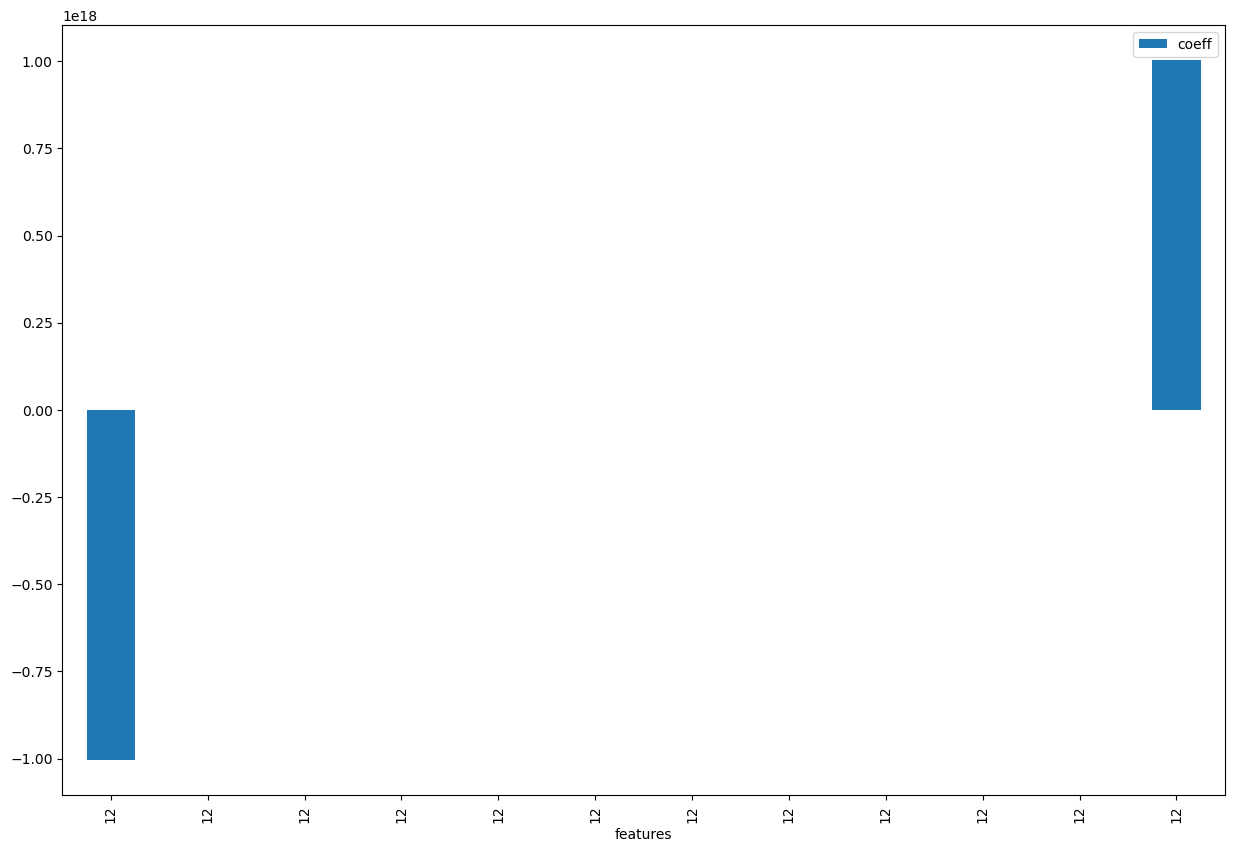

RSquare Value for TEST data is :  -119.0
RSquare Value for TRAIN data is :  9.0
MSE for Test data is :  801734126621931.0
MAE for Test data is :  1554840.0


In [59]:
from sklearn.linear_model import LinearRegression
import sklearn
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline


lm=LinearRegression()
regressionMethods(scaled_data, y, lm)

In [45]:
X.columns

Index(['Bathrooms', 'Car Parks', 'Furnishing', 'Size', 'Type', 'Property Type',
       'Position', 'No of Storey', 'area', 'No_of_Bedrooms',
       'No_of_servant_rooms', 'studio_apartment'],
      dtype='object')

In [58]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
unit_scaled_data = scaler.fit_transform(X)

# Separate features (X) and target variable (y)
#[0:'Location', 1:'Price', 2:'Rooms', 3:'Bathrooms', 4:'Car Parks', 5:'No of Storey',6:'Property Type', 7:'Position', 8:'Size', 9:'Furnishing']
# Index 0 = Location, 2: 'Rooms', 6: 'Property Type', 8: 'Size'


columns_to_keep = [0,1, 2, 3, 4,5,6,8,7,9,10,11]
#columns_to_keep = [0,2,3,5]
X_normalized = unit_scaled_data[:, columns_to_keep]


# Splitting the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_normalized, y, test_size=0.25, random_state=1)

# Training the model
regressionObject = LinearRegression()
regressionObject.fit(train_x, train_y)

# Predicting on the test set
predict_test = regressionObject.predict(test_x)

# Calculating evaluation metrics
r_square_test = regressionObject.score(test_x, test_y)
r_square_train = regressionObject.score(train_x, train_y)
mse_test = metrics.mean_squared_error(test_y, predict_test)
mae_test = metrics.mean_absolute_error(test_y, predict_test)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

predict_test


RSquare Value for TEST data is: 0.47
RSquare Value for Train data is: 0.98
MSE for Test data is: 363589399260083.06
MAE for Test data is: 1839085.2636002551


array([ 2219267.054607  ,  3405967.41309724, -1777606.04974411, ...,
        1654909.61682882,  1597460.55888399,  2832241.55203927])

In [47]:
X['Size'].value_counts()

Size
0.0        1087
1650.0      881
1400.0      588
1100.0      537
1760.0      480
           ... 
6463.0        1
4316.0        1
28667.0       1
28500.0       1
6050.0        1
Name: count, Length: 4144, dtype: int64

In [209]:
X.shape

(46557, 12)

In [194]:
df_filtered = df[df['Size'] != 0 ]

In [195]:
df_filtered['Size'].value_counts()



Size
1650.0     881
1400.0     588
1100.0     537
1760.0     480
1200.0     476
          ... 
6463.0       1
4316.0       1
28667.0      1
28500.0      1
6050.0       1
Name: count, Length: 4143, dtype: int64

In [196]:
value_counts = df_filtered['Size'].value_counts()
values_to_remove = value_counts[value_counts == 1].index
df_filtered1 = df_filtered[~df_filtered['Size'].isin(values_to_remove)]

In [197]:
df_filtered1['Size'].value_counts()

Size
1650.0    881
1400.0    588
1100.0    537
1760.0    480
1200.0    476
         ... 
5356.0      2
4424.0      2
2502.0      2
4626.0      2
5305.0      2
Name: count, Length: 2679, dtype: int64

In [182]:
X.sample(2)

,Bathrooms,Car Parks,Furnishing,Size,Type,Property Type,Position,No of Storey,area,No_of_Bedrooms,No_of_servant_rooms,studio_apartment
31441,6,0,0,9700.0,1,1,1,0.0,55,5,2,0
34314,6,0,1,4000.0,1,7,7,0.0,23,5,1,0


In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
%matplotlib inline


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(9822,)

In [51]:
from sklearn import tree

mytree = tree.DecisionTreeRegressor(min_samples_leaf = 50, min_samples_split=200)
mytree.fit(X_train, y_train)
predicted = mytree.predict(X_test)
predicted

array([1171331.28140704,  690441.86227545,  408426.05633803, ...,
       1820390.        ,  927509.46907216, 1599302.8028169 ])

In [52]:
r_square_test = regressionObject.score(X_test, y_test)
r_square_train = regressionObject.score(X_train, y_train)
mse_test = metrics.mean_squared_error(y_test, predicted)
mae_test = metrics.mean_absolute_error(y_test, predicted)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

RSquare Value for TEST data is: -268640326796.37
RSquare Value for Train data is: -3843802753555.3
MSE for Test data is: 403001061710190.9
MAE for Test data is: 1001584.164479308


/Users/Z002KG2/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/Z002KG2/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [53]:
X['Size'].value_counts()

Size
0.0        1087
1650.0      881
1400.0      588
1100.0      537
1760.0      480
           ... 
6463.0        1
4316.0        1
28667.0       1
28500.0       1
6050.0        1
Name: count, Length: 4144, dtype: int64

In [80]:
df_cond = df_cond[df_cond['Property Type'] == 'Condominium']

In [81]:
df_cond.describe()

,Price,Bathrooms,Car Parks,Size,No of Storey,No_of_Bedrooms,No_of_servant_rooms,studio_apartment
count,2.100900e+04,21009.000000,21009.000000,21009.000000,21009.0,21009.000000,21009.000000,21009.000000
mean,1.596168e+06,2.899138,1.494740,1980.834548,0.0,3.066591,0.494169,0.002808
std,1.925928e+07,1.331220,1.091485,9853.109975,0.0,0.862386,0.559550,0.052920
min,1.000000e+01,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,5.600000e+05,2.000000,1.000000,1098.000000,0.0,3.000000,0.000000,0.000000
50%,8.700000e+05,2.000000,2.000000,1399.000000,0.0,3.000000,0.000000,0.000000
75%,1.580000e+06,4.000000,2.000000,2036.000000,0.0,3.000000,1.000000,0.000000
max,1.980000e+09,12.000000,13.000000,790000.000000,0.0,12.000000,2.000000,1.000000


In [82]:
df_cond.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21009 entries, 2 to 49107
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                21009 non-null  int64  
 1   Bathrooms            21009 non-null  int64  
 2   Car Parks            21009 non-null  int64  
 3   Furnishing           21009 non-null  object 
 4   Size                 21009 non-null  float64
 5   Type                 21009 non-null  object 
 6   Property Type        21009 non-null  object 
 7   Position             21009 non-null  object 
 8   No of Storey         21009 non-null  float64
 9   area                 21009 non-null  object 
 10  No_of_Bedrooms       21009 non-null  int64  
 11  No_of_servant_rooms  21009 non-null  int64  
 12  studio_apartment     21009 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 2.2+ MB


In [87]:
df_cond.head()

,Price,Bathrooms,Car Parks,Furnishing,Size,Type,Property Type,Position,No of Storey,area,No_of_Bedrooms,No_of_servant_rooms,studio_apartment
2,1030000,4,2,Partly Furnished,1875.0,Built-up,Condominium,Corner,0.0,Dutamas,3,0,0
3,900000,3,2,Partly Furnished,1513.0,Built-up,Condominium,Corner,0.0,Bukit Jalil,4,1,0
14,1780000,4,2,Partly Furnished,1830.0,Built-up,Condominium,Corner,0.0,Mont Kiara,4,1,0
15,3450000,6,3,Fully Furnished,3720.0,Built-up,Condominium,Corner,0.0,Mont Kiara,4,1,0
16,1500000,4,2,Partly Furnished,1798.0,Built-up,Condominium,Corner,0.0,Desa ParkCity,3,2,0


In [88]:
df = df_cond.copy()

Bathrooms: 0.6794
Car Parks: 0.3815
Furnishing: 0.2408
Size: 1.3789
Type: 0.0039
Property Type: 0.0000
Position: 0.0024
No of Storey: 0.0066
area: 0.7620
No_of_Bedrooms: 0.4337
No_of_servant_rooms: 0.3527
studio_apartment: 0.0057


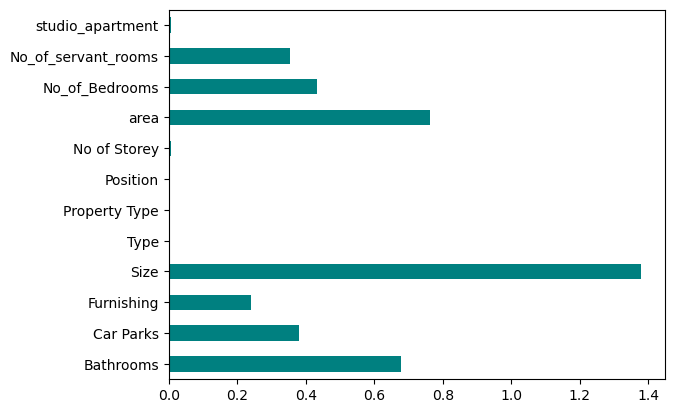

In [89]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder



# Encode categorical variables with LabelEncoder
encoder = LabelEncoder()
df['Property Type'] = encoder.fit_transform(df['Property Type'])
df['Position'] = encoder.fit_transform(df['Position'])
df['Furnishing'] = encoder.fit_transform(df['Furnishing'])
df['area'] = encoder.fit_transform(df['area'])
df['Type'] = encoder.fit_transform(df['Type'])

# Separate features (X) and target variable (y)
X = condo_df.drop(columns=['Price'])
y = condo_df['Price']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)

# Print feature importance scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")


feat_importances = pd.Series(mi_scores, X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

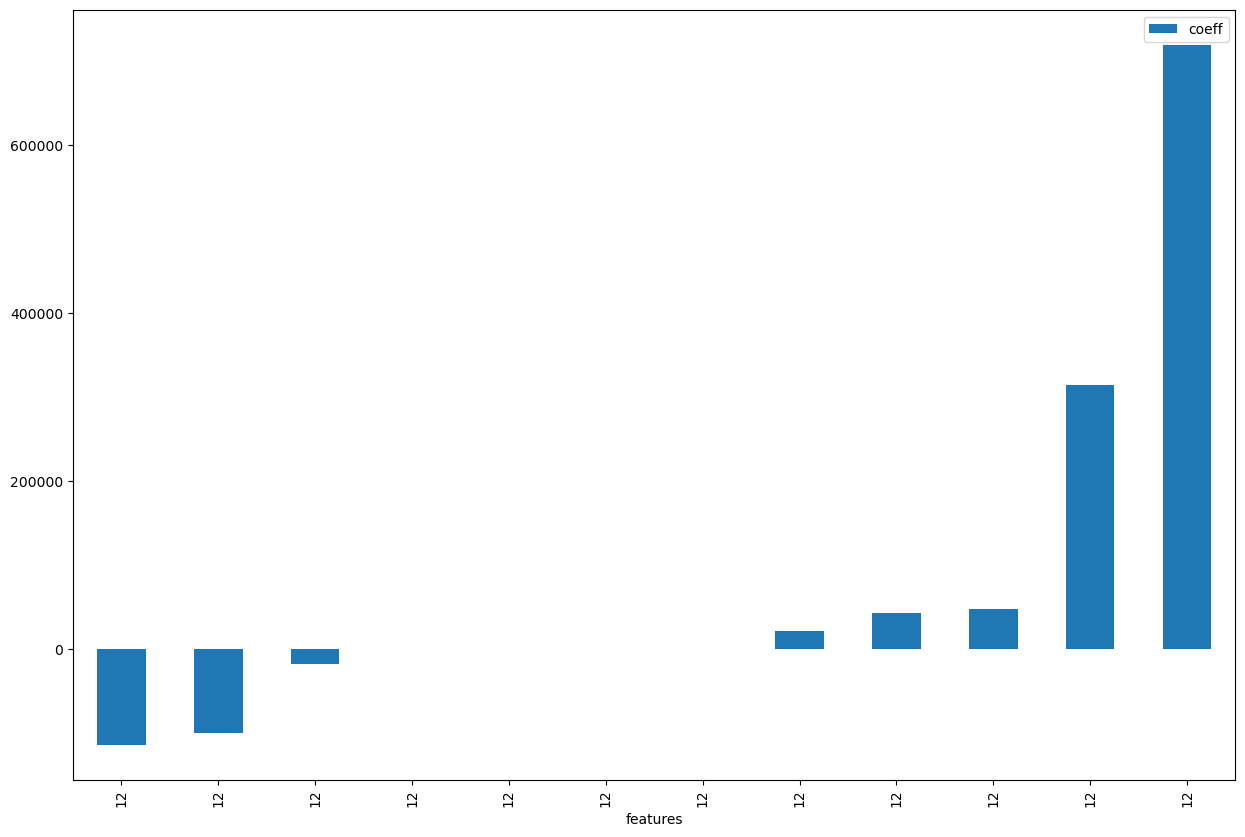

RSquare Value for TEST data is :  0.0
RSquare Value for TRAIN data is :  28.0
MSE for Test data is :  1471338844563512.0
MAE for Test data is :  1530206.0


In [91]:
lm=LinearRegression()
regressionMethods(X, y, lm)

In [93]:
X_4 = df[['Size', 'Bathrooms', 'area', 'No_of_Bedrooms']]

In [99]:
X_4.sample(5)

,Size,Bathrooms,area,No_of_Bedrooms
25104,2228.0,4,1,3
18433,441.0,1,23,1
14601,1300.0,2,35,3
29854,1209.0,2,29,2
14800,893.0,2,10,2


In [100]:
from sklearn.preprocessing import MinMaxScaler


# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(X_4)

print("Original data:")
print(X_4)
print("\nScaled data:")
print(scaled_data)


Original data:
         Size  Bathrooms  area  No_of_Bedrooms
2      1875.0          4    16               3
3      1513.0          3     9               4
14     1830.0          4    29               4
15     3720.0          6    29               4
16     1798.0          4    14               3
...       ...        ...   ...             ...
49097  3466.0          5    38               4
49099  1092.0          2     6               3
49101  3973.0          6    38               4
49106  1150.0          2    45               3
49107  1313.0          2    36               4

[21009 rows x 4 columns]

Scaled data:
[[0.00237342 0.33333333 0.35555556 0.25      ]
 [0.00191519 0.25       0.2        0.33333333]
 [0.00231646 0.33333333 0.64444444 0.33333333]
 ...
 [0.00502911 0.5        0.84444444 0.33333333]
 [0.0014557  0.16666667 1.         0.25      ]
 [0.00166203 0.16666667 0.8        0.33333333]]


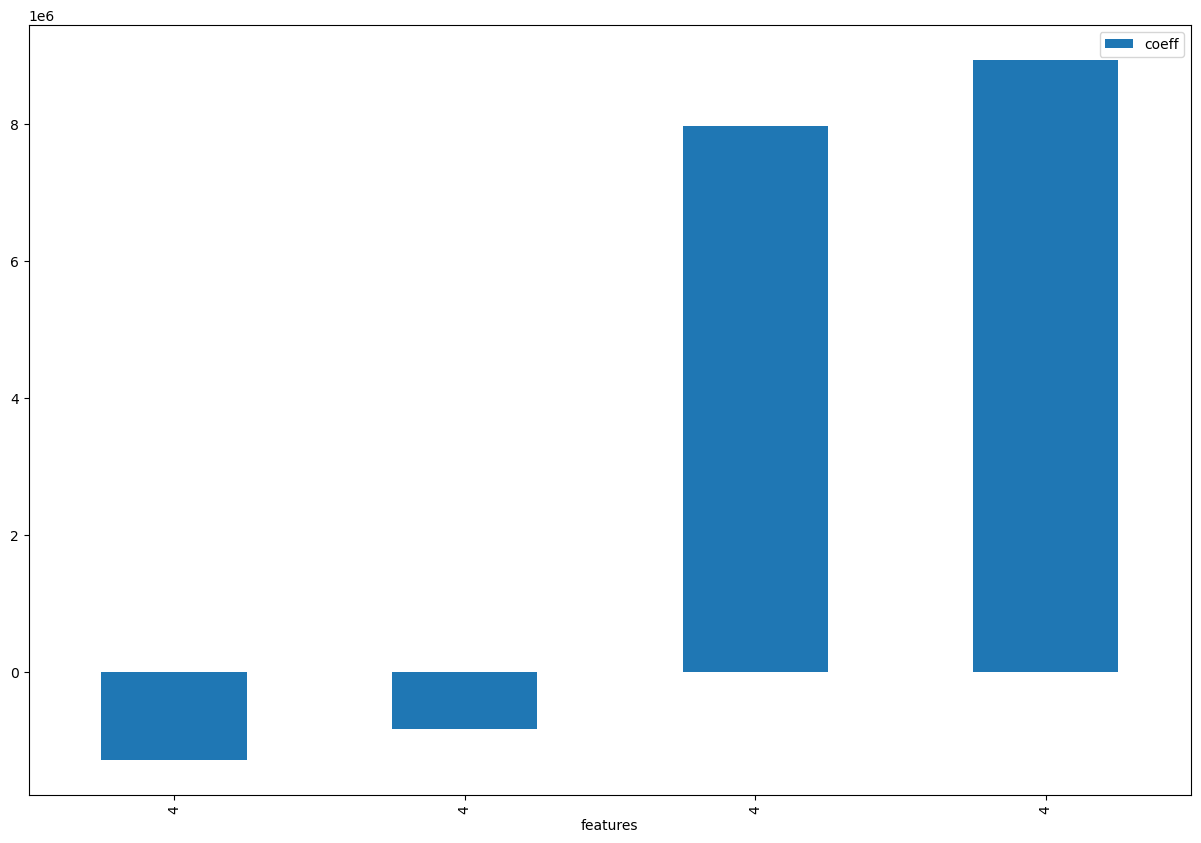

RSquare Value for TEST data is :  0.0
RSquare Value for TRAIN data is :  28.0
MSE for Test data is :  1471381801321870.0
MAE for Test data is :  1528668.0


In [101]:
lm=LinearRegression()
regressionMethods(scaled_data, y, lm)

In [103]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
unit_scaled_data = scaler.fit_transform(X_4)

# Separate features (X) and target variable (y)
#[0:'Location', 1:'Price', 2:'Rooms', 3:'Bathrooms', 4:'Car Parks', 5:'No of Storey',6:'Property Type', 7:'Position', 8:'Size', 9:'Furnishing']
# Index 0 = Location, 2: 'Rooms', 6: 'Property Type', 8: 'Size'


#columns_to_keep = [0,1, 2, 3, 4,5,6,8,7,9,10,11]
columns_to_keep = [0,1,2,3]
X_normalized = unit_scaled_data[:, columns_to_keep]


# Splitting the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_normalized, y, test_size=0.25, random_state=1)

# Training the model
regressionObject = LinearRegression()
regressionObject.fit(train_x, train_y)

# Predicting on the test set
predict_test = regressionObject.predict(test_x)

# Calculating evaluation metrics
r_square_test = regressionObject.score(test_x, test_y)
r_square_train = regressionObject.score(train_x, train_y)
mse_test = metrics.mean_squared_error(test_y, predict_test)
mae_test = metrics.mean_absolute_error(test_y, predict_test)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

predict_test


RSquare Value for TEST data is: -0.01
RSquare Value for Train data is: 7.38
MSE for Test data is: 1472807777802578.5
MAE for Test data is: 1698179.4996229887


array([1528509.45899872, 1504077.8812285 ,  773757.51310952, ...,
       1684452.97044668, 1118170.27924011, 1451759.49833346])

In [74]:
X.columns

Index(['Bathrooms', 'Car Parks', 'Furnishing', 'Size', 'Type', 'Property Type',
       'Position', 'No of Storey', 'area', 'No_of_Bedrooms',
       'No_of_servant_rooms', 'studio_apartment'],
      dtype='object')

In [108]:
df_cond.head(5)

,Price,Bathrooms,Car Parks,Furnishing,Size,Type,Property Type,Position,No of Storey,area,No_of_Bedrooms,No_of_servant_rooms,studio_apartment
2,1030000,4,2,Partly Furnished,1875.0,Built-up,Condominium,Corner,0.0,Dutamas,3,0,0
3,900000,3,2,Partly Furnished,1513.0,Built-up,Condominium,Corner,0.0,Bukit Jalil,4,1,0
14,1780000,4,2,Partly Furnished,1830.0,Built-up,Condominium,Corner,0.0,Mont Kiara,4,1,0
15,3450000,6,3,Fully Furnished,3720.0,Built-up,Condominium,Corner,0.0,Mont Kiara,4,1,0
16,1500000,4,2,Partly Furnished,1798.0,Built-up,Condominium,Corner,0.0,Desa ParkCity,3,2,0


In [112]:
df_dummy = pd.get_dummies(df_cond, columns=['area', 'Furnishing','Position'])


In [113]:
df_dummy.head()

,Price,Bathrooms,Car Parks,Size,Type,Property Type,No of Storey,No_of_Bedrooms,No_of_servant_rooms,studio_apartment,...,Furnishing_Unknown,Position_Corner,Position_Duplex,Position_EndLot,Position_Intermediate,Position_Penthouse,Position_SOHO,Position_Studio,Position_Triplex,Position_Unknown
2,1030000,4,2,1875.0,Built-up,Condominium,0.0,3,0,0,...,False,True,False,False,False,False,False,False,False,False
3,900000,3,2,1513.0,Built-up,Condominium,0.0,4,1,0,...,False,True,False,False,False,False,False,False,False,False
14,1780000,4,2,1830.0,Built-up,Condominium,0.0,4,1,0,...,False,True,False,False,False,False,False,False,False,False
15,3450000,6,3,3720.0,Built-up,Condominium,0.0,4,1,0,...,False,True,False,False,False,False,False,False,False,False
16,1500000,4,2,1798.0,Built-up,Condominium,0.0,3,2,0,...,False,True,False,False,False,False,False,False,False,False


In [115]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21009 entries, 2 to 49107
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Price                                   21009 non-null  int64  
 1   Bathrooms                               21009 non-null  int64  
 2   Car Parks                               21009 non-null  int64  
 3   Size                                    21009 non-null  float64
 4   Type                                    21009 non-null  object 
 5   Property Type                           21009 non-null  object 
 6   No of Storey                            21009 non-null  float64
 7   No_of_Bedrooms                          21009 non-null  int64  
 8   No_of_servant_rooms                     21009 non-null  int64  
 9   studio_apartment                        21009 non-null  int64  
 10  area_Ampang                             21009 non-null  bool   

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Splitting the data
X = df_dummy.drop({'Price', 'Property Type', 'Type'}, axis=1)
y = df_dummy['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 24478222.245648403


In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model with Gradient Boosting
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 600044884102238.6
Root Mean Squared Error: 24495813.603598446
